# Исследование неэффективности рекламной компании развлекательного приложения

Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей было безрезультативно потрачено большое количество денег. Нужно исследовать причины убытков при использовании рекламы.

**Вводные данные**: лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов.

**Цель исследования**: изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

**Ход исследования**:
1. Обзор и предварительная обработка данных.
2. Исследовательский анализ данных.
3. Маркетинговый анализ данных.
4. Оценка окупаемости рекламы.

**Используемые библиотеки**:
1. pandas
2. datetime
3. matplotlib
4. numpy
5. seaborn

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## Обзор и предварительная обработка данных 

На первом этапе необходимо импортировать данные:

`visits` - набор данных с информацией о визитах пользователей

`orders` - набор данных с информацией о покупках пользователей

`costs` - набор данных с информацией о затраченных на привлечение пользователей средствах

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

**Описание данных**

`visits` (информация о пользовательских сессиях):

* User Id — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Session start — дата и время начала сессии
* Session End — дата и время окончания сессии
* Channel — идентификатор рекламного источника, из которого пришел пользователь
* Region - страна пользователя

`orders` (информация о заказах):

* User Id — уникальный id пользователя, который сделал заказ
* Event Dt — дата и время покупки
* Revenue — выручка

`costs` (информация о затратах на маркетинг):

* Channel — идентификатор рекламного источника
* Dt — дата
* Costs — затраты на этот рекламный источник в этот день

### Обзор данных

Проведем общий обзор данных:

In [3]:
display(visits.head())
print(visits.info())
print('Количество дубликатов:', visits.duplicated().sum())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
Количество дубликатов: 0


Набор данных с информацией о визитах пользователей является корректным, однако необходимо привести "временные" атрибуты к соответствующему типу. В данных отсутствуют явные дубликаты.

In [4]:
display(orders.head())
orders.info()
print('Количество дубликатов:', orders.duplicated().sum())

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Количество дубликатов: 0


Набор данных с информацией о тратах пользователей является корректным, однако необходимо привести "временные" атрибуты к соответствующему типу. В данных отсутствуют явные дубликаты.

In [5]:
display(costs.head())
print(costs.info())
print('Количество дубликатов:', costs.duplicated().sum())

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
Количество дубликатов: 0


Набор данных с информацией о затратах на привлечение пользователей является корректным, однако необходимо привести "временные" атрибуты к соответствующему типу. В данных отсутствуют явные дубликаты.

### Предварительная обработка данных

Приведем типы данным к требуемым и переименуем названия столбцов для удобства дальнейшего использования:

In [6]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [7]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

#### Вывод

Проведен общий обзор данных. Данные являются корректными и достаточными для проведения дальнейшего анализа.

## Подготовка необходимых функций

### Функция для получения пользовательских профилей

In [8]:
def get_profiles(sessions, orders, ad_costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Оконная функция

In [9]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функции для расчёта удержания пользователей и визуализации удержания пользователей

In [10]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

### Функции для расчёта и визуализации пользовательской конверсии

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


### Функции для расчёта и визуализации LTV и ROI

In [12]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Вывод

Подготовлены все необходимые функции для дальнейшего анализа данных.

## Исследовательский анализ данных

### Получение пользовательских профилей

Для начала необходимо получить пользовательские профили. Воспользуемся написанной ранее функцией `get_profiles`

In [13]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [14]:
print('Минимальная дата привлечения пользователей:', profiles.dt.min())
print('Максимальная дата привлечения пользователей', profiles.dt.max())

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей 2019-10-27 00:00:00


#### Вывод

Пользовательские профили выглядят корректно. Пользователи, пришедшие после 18 октября не попадут в исследование, т.к. не "прожили" требуемый лайфтайм.

### Распределение пользователей по странам

Для начала необходимо изучить распределение пользователей по странам:

In [15]:
print('Распределение пользователей по странам:')
region_all = profiles.groupby('region')['user_id'].nunique().sort_values(ascending = False).reset_index()
region_pay = profiles[profiles['payer'] == True].groupby('region')['user_id'].nunique().sort_values(ascending = False).reset_index()
region_users = region_all.merge(region_pay, on='region', how='inner')
region_users.columns = ['region', 'all_users', 'payers']
region_users['% of payers'] = round(region_users.payers / region_users.all_users * 100, 2)
region_users

Распределение пользователей по странам:


,region,all_users,payers,% of payers
0,United States,100002,6902,6.90
1,UK,17575,700,3.98
2,France,17450,663,3.80
3,Germany,14981,616,4.11


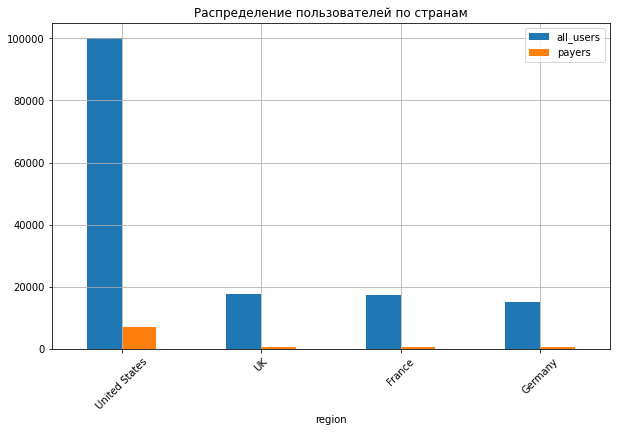

In [16]:
region_users.plot.bar(x='region', y=['all_users', 'payers'], grid=True, figsize=(10,6))
plt.xticks(rotation=45);
plt.title('Распределение пользователей по странам');

#### Вывод
Нетрудно заметить, что большинство пользователей приходят из США, причем как платящих, так и неплатящих. Также следует обратить внимание на то, что количество пользователей из остальных стран (Великобритания, Франция, Германия) в несколько раз меньше количества пользователей из США. Процент платящих пользователей из США так же выше, чем у других стран.

### Распределение пользователей по устройствам

Рассмотрим распределение пользователей по используемым девайсам:

In [17]:
print('Распределение пользователей по девайсам:')
device_all = profiles.groupby('device')['user_id'].nunique().sort_values(ascending = False).reset_index()
device_pay = profiles[profiles['payer'] == True].groupby('device')['user_id'].nunique().sort_values(ascending = False).reset_index()
device_users = device_all.merge(device_pay, on='device', how='inner')
device_users.columns = ['device', 'all_users', 'payers']
device_users['% of payers'] = round(device_users.payers / device_users.all_users * 100, 2)
device_users

Распределение пользователей по девайсам:


,device,all_users,payers,% of payers
0,iPhone,54479,3382,6.21
1,Android,35032,2050,5.85
2,PC,30455,1537,5.05
3,Mac,30042,1912,6.36


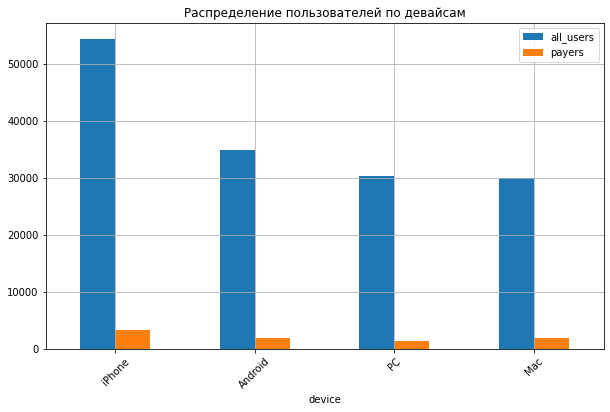

In [18]:
device_users.plot.bar(x='device', y=['all_users', 'payers'], grid=True, figsize=(10,6))
plt.xticks(rotation=45);
plt.title('Распределение пользователей по девайсам');

#### Вывод
Большинство пользователей используют iPhone, доля платящих пользователей iPhone так же выше, чем у других девайсов.

### Распределение пользователей по каналам привлечения

Рассмотрим распределение пользователей по каналам привлечения:

In [19]:
print('Распределение пользователей по каналам привлечения:')
channel_all = profiles.groupby('channel')['user_id'].nunique().sort_values(ascending = False).reset_index()
channel_pay = profiles[profiles['payer'] == True].groupby('channel')['user_id'].nunique().sort_values(ascending = False).reset_index()
channel_users = channel_all.merge(channel_pay, on='channel', how='inner')
channel_users.columns = ['channel', 'all_users', 'payers']
channel_users['% of payers'] = round(channel_users.payers / channel_users.all_users * 100, 2)
channel_users

Распределение пользователей по каналам привлечения:


,channel,all_users,payers,% of payers
0,organic,56439,1160,2.06
1,FaceBoom,29144,3557,12.20
2,TipTop,19561,1878,9.60
3,OppleCreativeMedia,8605,233,2.71
4,LeapBob,8553,262,3.06
5,WahooNetBanner,8553,453,5.30
6,RocketSuperAds,4448,352,7.91
7,MediaTornado,4364,156,3.57
8,YRabbit,4312,165,3.83
9,AdNonSense,3880,440,11.34


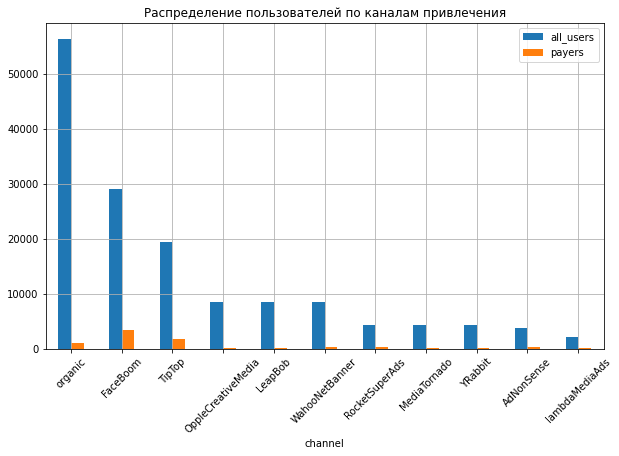

In [20]:
channel_users.plot.bar(x='channel', y=['all_users', 'payers'], grid=True, figsize=(10,6))
plt.xticks(rotation=45);
plt.title('Распределение пользователей по каналам привлечения');

#### Вывод
Из органического канала приходит самое большое число пользователей, однако, важно обратить внимание на то, что данный канал имеет самый низкий процент платящих пользователей. Самый высокий процент платящих пользователей приходит из канала FaceBoom.

### Вывод по исследовательскому анализу
* Исследованы базовые значения конверсии пользователей в платящих пользователей в свете различных атрибутов.
* Определен основной рынок на текущий момент. Большинство пользователей приходят из США.
* Важно обратить внимание на то, что большинство пользователей приходят с мобильных устройств (iPhone и смартфоны на базе ОС Android).
* Пользователи Mac и iPhone эффективнее всего конвертируются в покупателей.
* Большинство пользователей приходит из органического канала, при этом среди них, самый низкий процент платящих пользователей.
* Больше всего платящих пользователей приходят из канала FaceBoom.


## Маркетинговый анализ данных

Далее необходимо изучить затраты на привлечение пользователей.

Для начала проверим, сколько всего денег было потрачено на привлечение пользователей:

In [21]:
print('Потрачено на привлечение пользователей: ', round(costs.costs.sum(), 2), 'у.е.')

Потрачено на привлечение пользователей:  105497.3 у.е.


### Затраты на каждый канал привлечения

Далее проверим, сколько денег было потрачено на каждый канал привлечения:

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


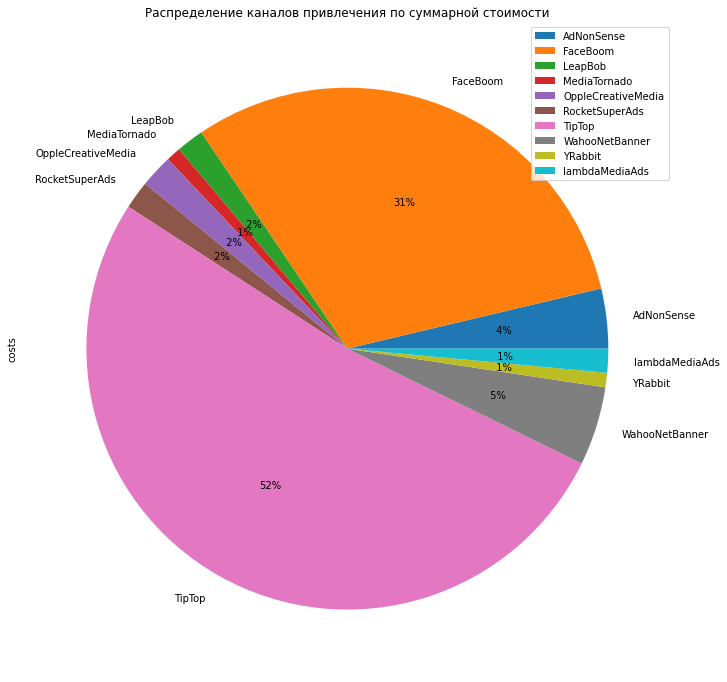

In [22]:
channel_costs = costs.groupby('channel').sum()
display(channel_costs.sort_values(by='costs', ascending=False))
channel_costs.plot.pie(y='costs', figsize=(15, 12), autopct='%2.0f%%')
plt.legend(loc='best');
plt.title('Распределение каналов привлечения по суммарной стоимости');

#### Вывод

Отчетливо заметно два абсолютных лидера по количеству потраченных средств. На каналы FaceBoom и TipTop потрачено более 80% бюджета привлечения.

### Ежедневные затраты на привлечение пользователей

Далее проверим, как менялись ежедневные траты на привлечение пользователей.

,costs
dt,
2019-09-28,1075.485
2019-09-29,1064.970
2019-09-22,1041.455
2019-09-27,1034.140
2019-10-03,984.255
...,...
2019-05-14,259.885
2019-05-08,259.595
2019-05-09,243.670


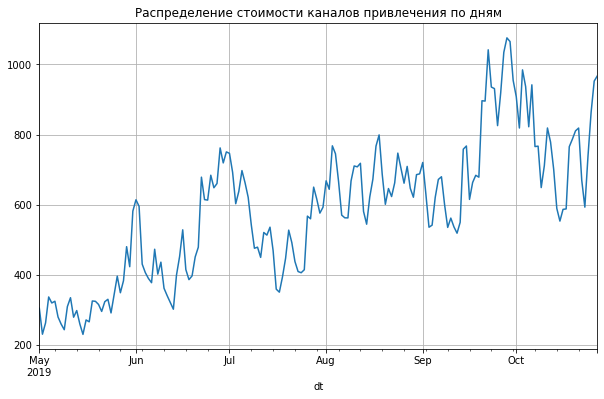

In [23]:
dt_costs = costs.groupby('dt').sum()
display(dt_costs.sort_values(by='costs', ascending=False))
dt_costs.plot(grid=True, figsize=(10,6), legend=False);
plt.title('Распределение стоимости каналов привлечения по дням');

#### Вывод

Нетрудно заметить, что в период с мая по ноябрь 2019 года присутствует стойкая тенденция к увеличению расходов на привлечение пользователей.

### Ежедневные затраты на каждый канал привлечения

Построим тепловую карту распределения стоимости привлечения пользователей в зависимости от даты.

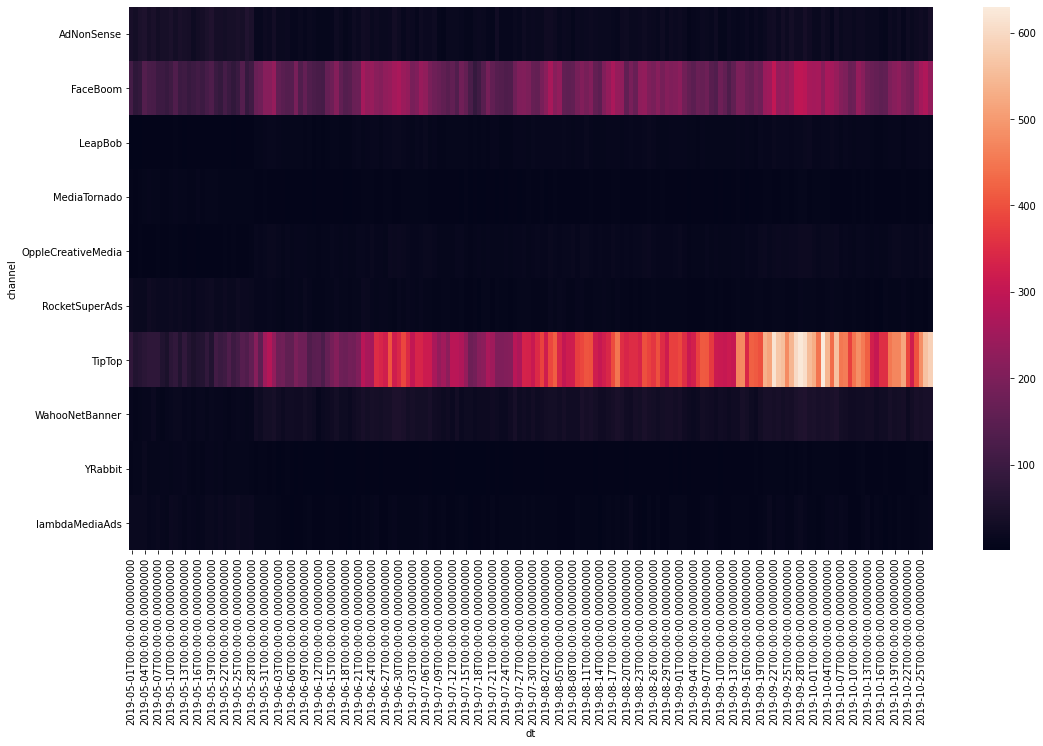

In [24]:
pivot_costs = costs.pivot_table(index='channel', columns='dt', values='costs', aggfunc='sum')
plt.figure(figsize=(18,10));
sns.heatmap(pivot_costs);

#### Вывод

Как ранее было замечено, большинство затрат приходится на каналы FaceBoom и TipTop, однако для канала TipTop наблюдается тенденция к стабильному увеличению бюджета. В канале FaceBoom такого стремительного роста не наблюдается.

### Средняя стоимость привлечения пользователя

Исключим из рассмотрения органических пользователей, так как они будут сильно влиять на целевые показатели, а затем изучим среднюю стоимость привлечения пользователей.


In [25]:
print('Средняя стоимость привлечения пользователя без учета органических пользователей:', round(profiles.query('channel != "organic"').acquisition_cost.mean(), 2), 'у.е.')
print('Средняя стоимость привлечения пользователя с учетом органических пользователей:', round(profiles.acquisition_cost.mean(), 2), 'у.е.')

profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).to_frame()

Средняя стоимость привлечения пользователя без учета органических пользователей: 1.13 у.е.
Средняя стоимость привлечения пользователя с учетом органических пользователей: 0.7 у.е.


,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


#### Вывод

Стоимость привлечения одного пользователя из канала TipTop существенно превышает стоимость привлечения из других каналов. В дальнейшем на это стоить обратить повышенное внимание.

## Оценка окупаемости рекламы

### Общая окупаемость рекламы

Далее, оценим общую окупаемость рекламы:

In [26]:
profiles = profiles.query('channel != "organic"')
observation_date = datetime(2019,11,1)
horizon_days = 14

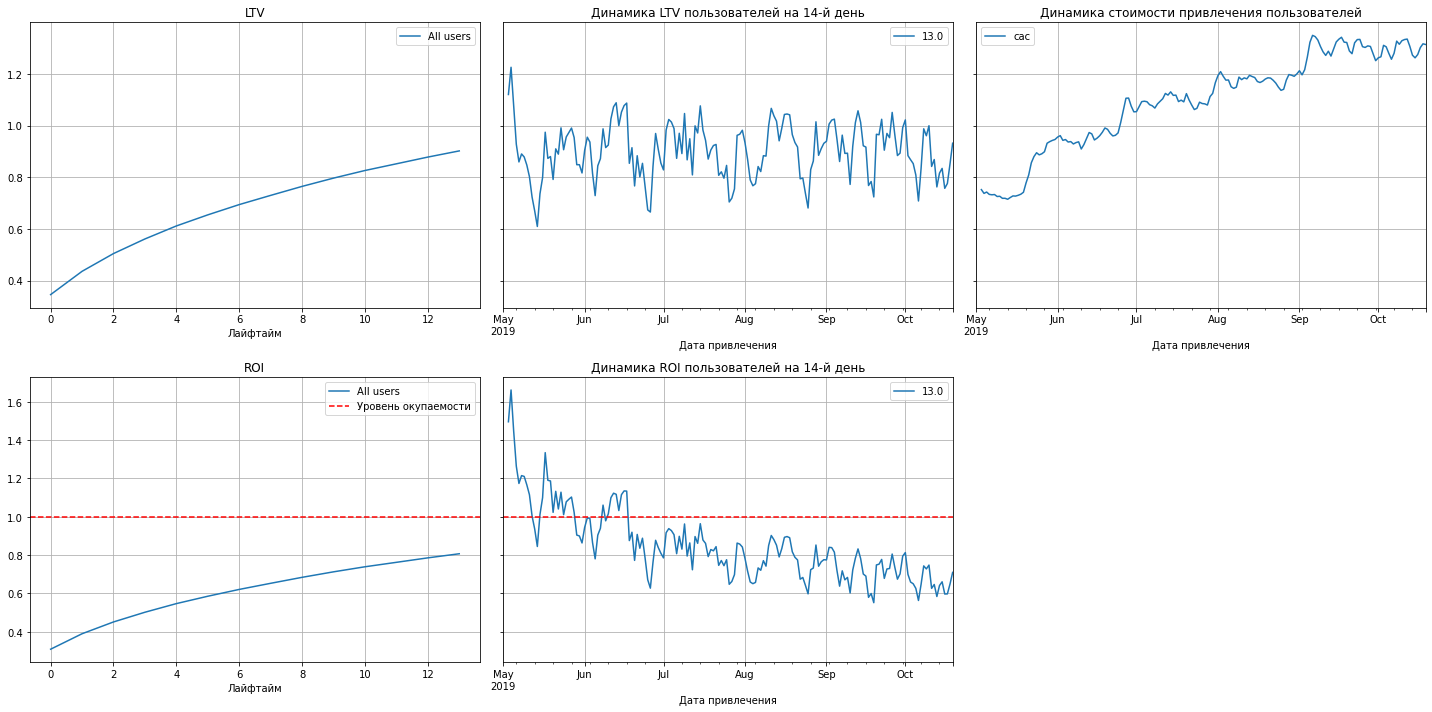

In [27]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, 
                                                      horizon_days, dimensions=[], ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=3)

Проанализируем каждый график более детально:

**LTV** - на 14 день жизни выручка с одного пользователя составляет около 0.9 у.е. 

**Динамика LTV пользователей на 14-й день** - в целом, динамика стабильная, сильных отклонений от общего тренда не наблюдается. Колебания могут быть связаны с сезонностью.

**Динамика стоимости привлечения пользователей** - в июне наблюдается небольшой скачок стоимости привлечения пользователей. Далее наблюдается устойчивая тенденция к увеличению стоимости привлечения.

**ROI** - реклама не достигает уровня окупаемости

**Динамика ROI пользователей на 14-й день** - прослеживается зависимость между увеличением стоимости привлечения пользователей и обратным переходом через уровень окупаемости рекламы. Таким образом, начиная с середины июня наблюдается стабильный убыток от рекламы.

Дополнительно оценим удержание пользователей и конверсию:

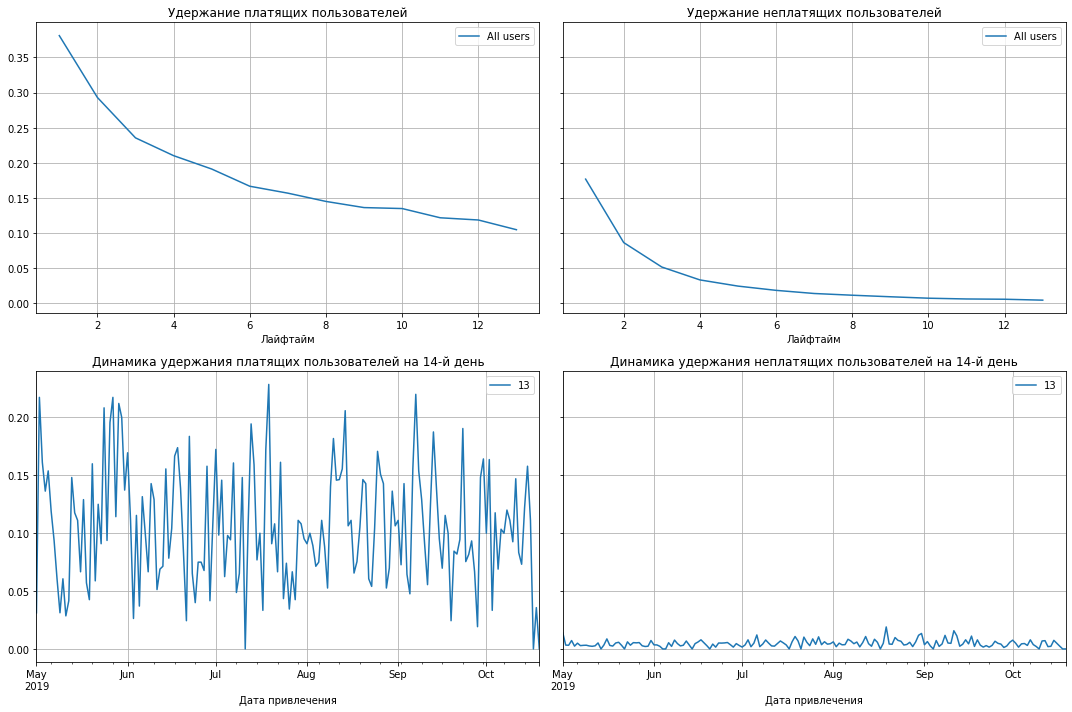

In [28]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = [], ignore_horizon = False)
plot_retention(retention_grouped, retention_history, horizon_days)

В целом, результат ожидаемый. Платящие пользователи намного чаще повторно пользуются сервисом. Удержание на 14 день выглядит довольно хаотично, но при этом, динамика убывания или роста не прослеживается.

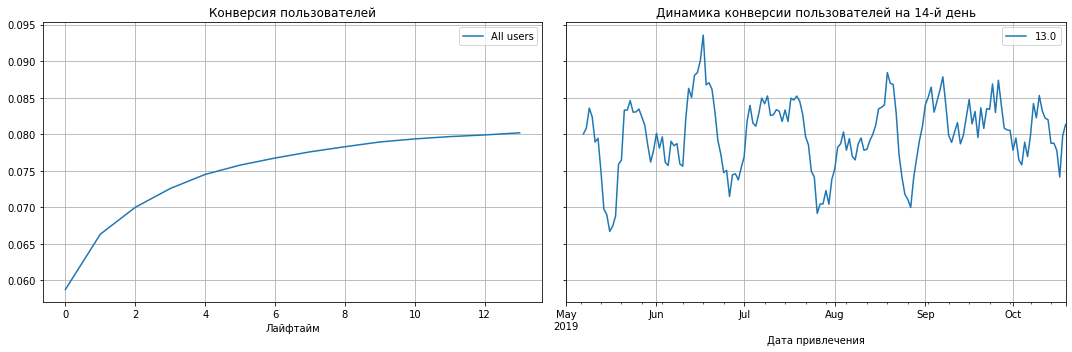

In [29]:
conversion_raw, conversion_grouped, conversion_history = get_conversion (profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия выглядит стабильно, однако стоит принять во внимание тот факт, что при "условно-стабильной" конверсии растёт стоимость привлечения, можно сделать вывод, что подорожание привлечения не увеличивает процент целевых действий.

### Окупаемость рекламы в разрезе устройств

Далее, оценим окупаемость рекламы с разбивкой по устройствам:

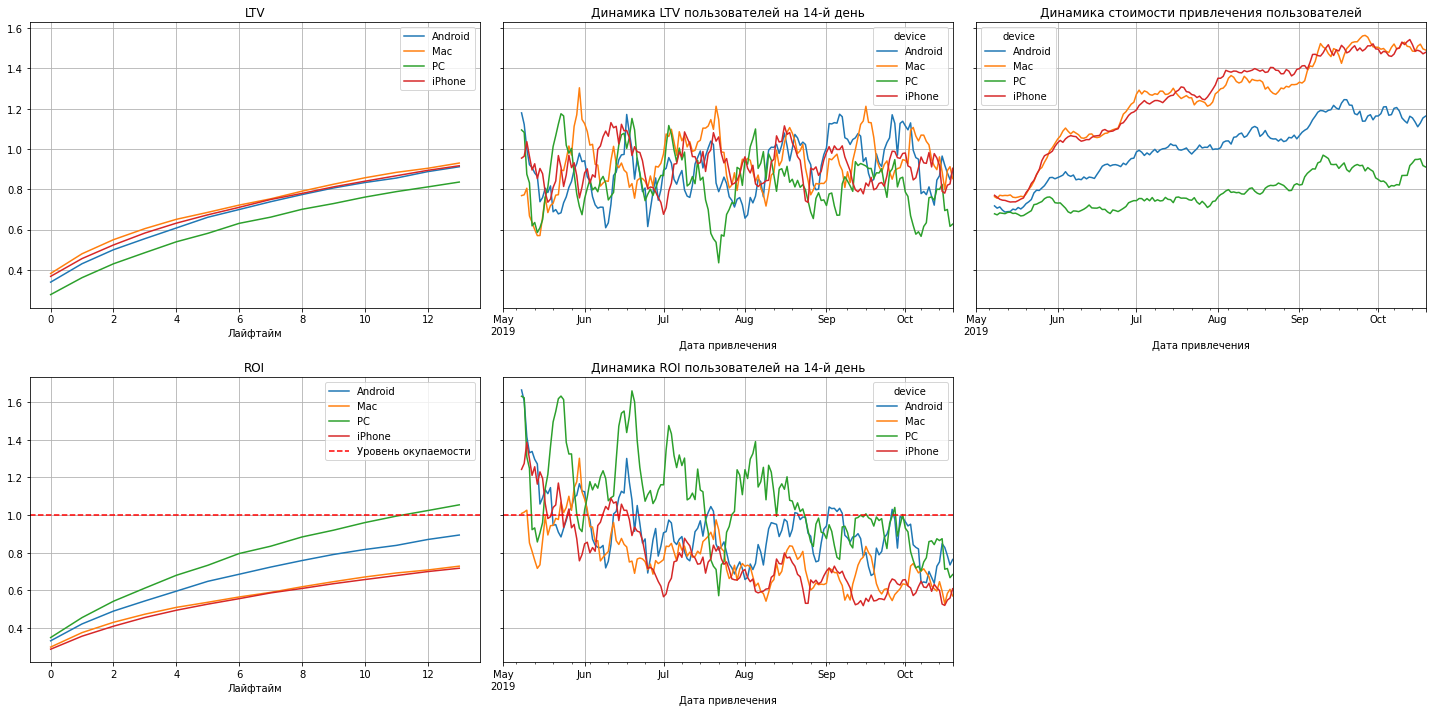

In [30]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, 
                                                      horizon_days, dimensions=['device'], ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=8)

Проанализируем каждый график более детально:

**LTV** - на 14 день жизни выручка с одного пользователя составляет от 0.8 до 1 у.е. для каждого из устройств. В целом, поведение кривой LTV для всех устройств очень похожее.

**Динамика LTV пользователей на 14-й день** - в целом, динамика стабильная, сильных отклонений от общего тренда не наблюдается.

**Динамика стоимости привлечения пользователей** - до июня стоимость привлечения для всех устройств "условно-похожая", начиная с июня стоимость привлечения для разных устройств начинает сильно расходиться. Стоит обратить внимание на то, что для устройств iPhone и Mac этот скачок существенно превосходит Android и PC.

**ROI** - окупаются только пользователи PC.

**Динамика ROI пользователей на 14-й день** - здесь становится ясно, что именно пользователи iPhone и Mac сильно снижают ROI в связи с резким подорожанием рекламы в июне. Важно обратить внимание, что пользователи остальных устройств после подорожания рекламы перестают окупаться на постоянной основе. Причем, принимая во внимание, что пользователей iPhone - довольно большое количество, можно сделать вывод что большое количество "убыточных" пользователей iPhone критически влияет на окупаемость рекламы "в целом".

Дополнительно оценим удержание пользователей и конверсию:

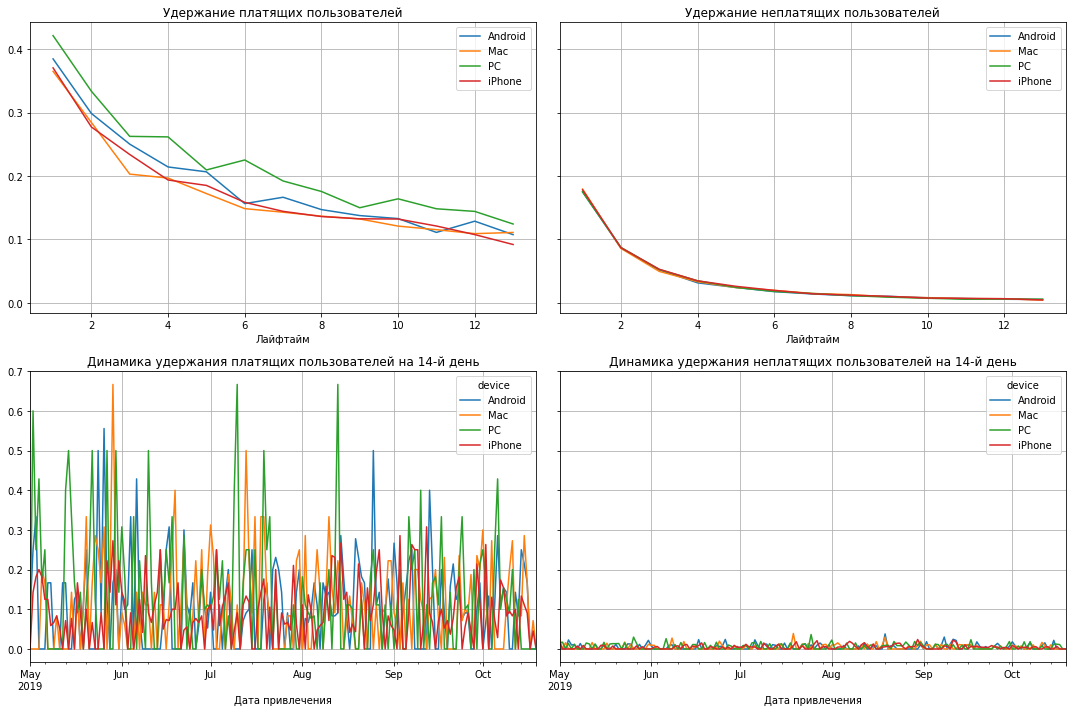

In [31]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['device'], ignore_horizon = False)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей PC немного превышает удержание платящих пользователей других девайсов. Динамика удержания выглядит стабильно, пиковые значения, вероятнее всего, вызваны сезонностью.

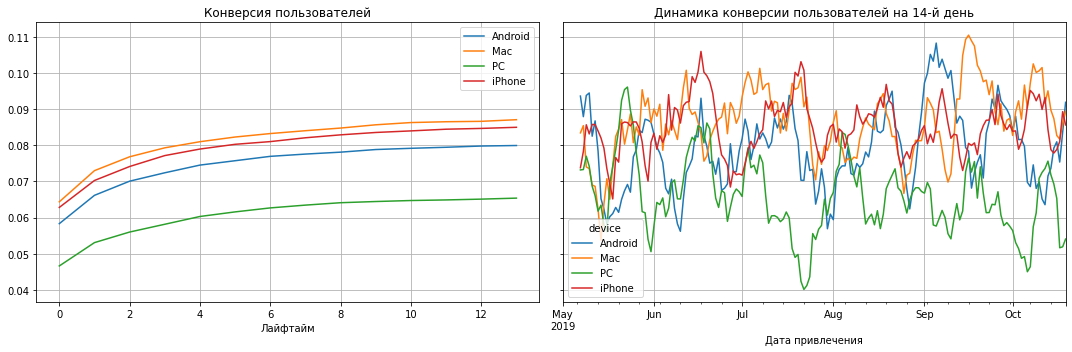

In [32]:
conversion_raw, conversion_grouped, conversion_history = get_conversion (profiles, orders, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей PC стабильно ниже конверсии пользователей других девайсов.

### Окупаемость рекламы в разрезе стран

Далее, оценим окупаемость рекламы с разбивкой по странам:

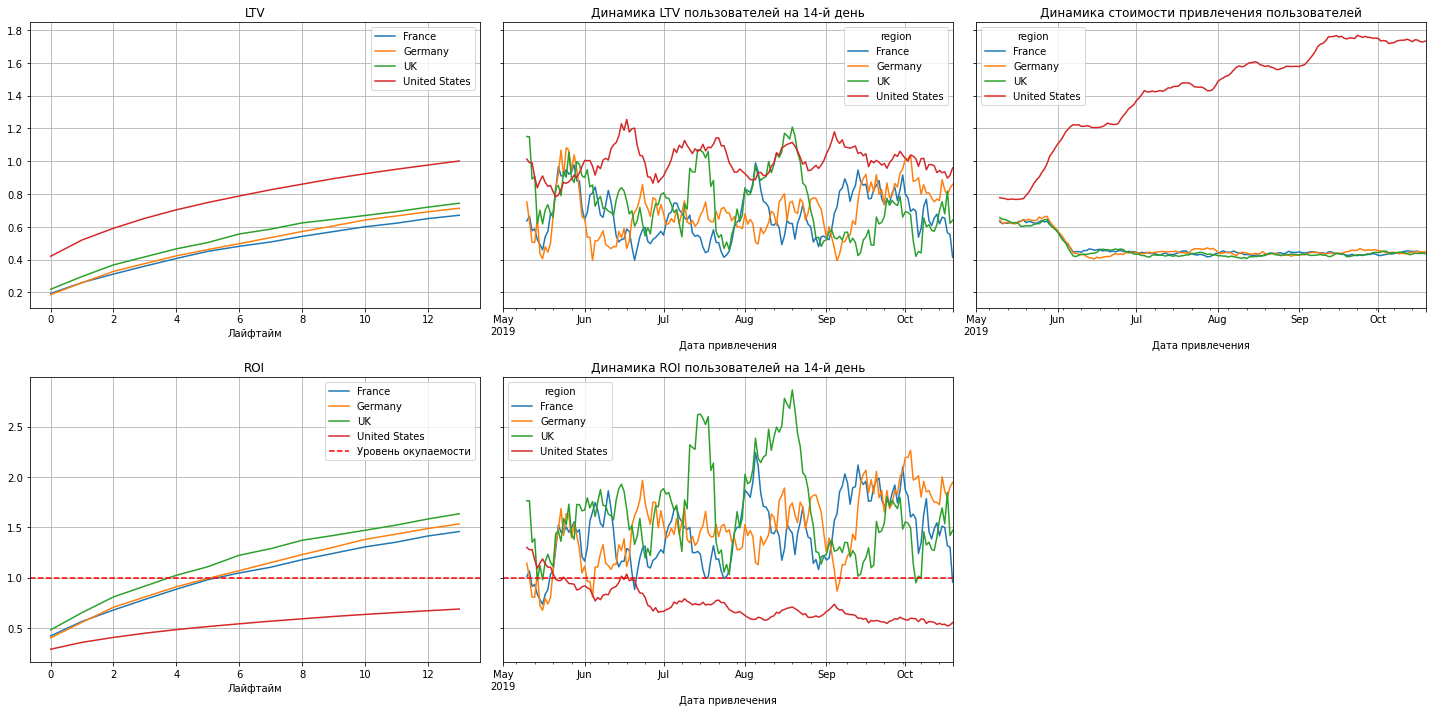

In [33]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, 
                                                      horizon_days, dimensions=['region'], ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=10)

Проанализируем каждый график более детально:

**LTV** - на 14 день жизни выручка с одного пользователя уже варьируется более сильно, по сравнению с предыдущими исследованиями. Пользователи из США приносят стабильно больше выручки.

**Динамика LTV пользователей на 14-й день** - в целом, динамика стабильная, сильных отклонений от общего тренда не наблюдается. С июня LTV 14 дня в США стабильно выше остальных стран.

**Динамика стоимости привлечения пользователей** - здесь становится очевидно, что стоимость рекламы существенно возрасла только в США. В остальных странах стоимость рекламы наоборот стала дешевле.

**ROI** - не окупаются только пользователи из США

**Динамика ROI пользователей на 14-й день** -все страны, кроме США стабильно удерживают ROI сильно выше уровня окупаемости. В США ROI начинает стремительно снижаться после подорожания рекламы.

Дополнительно оценим удержание пользователей и конверсию:

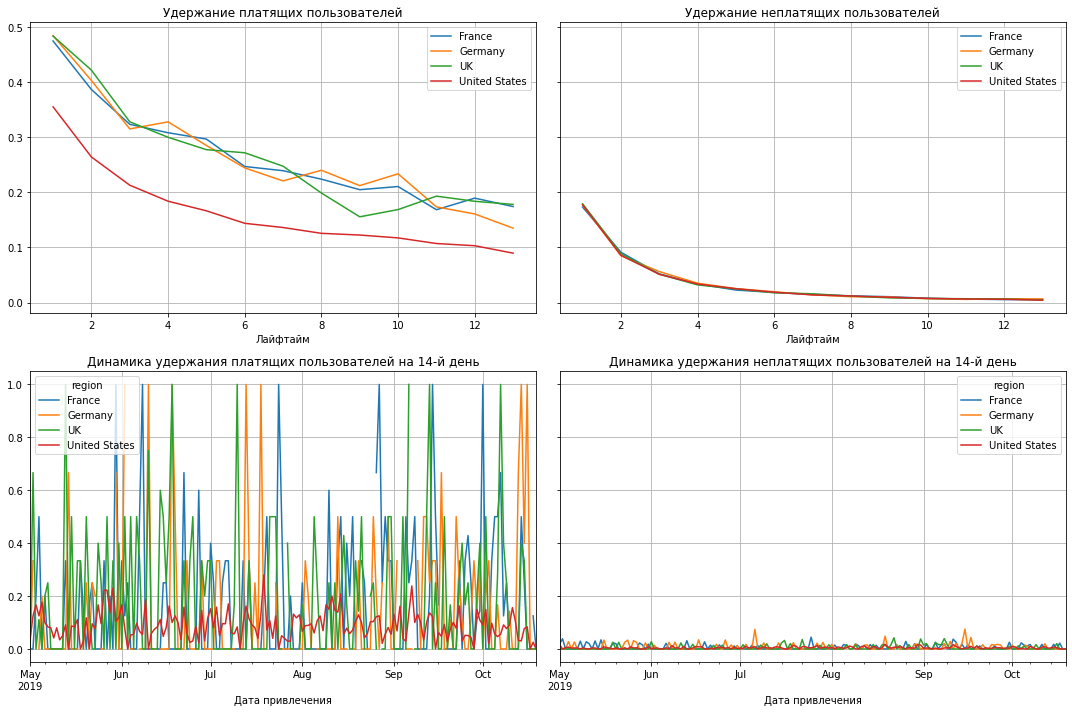

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['region'], ignore_horizon = False)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей из США существенно ниже удержания пользователей из других стран. Но при этом динамика 14 дня в США гораздо стабильнее и не имеет пиковых значений.

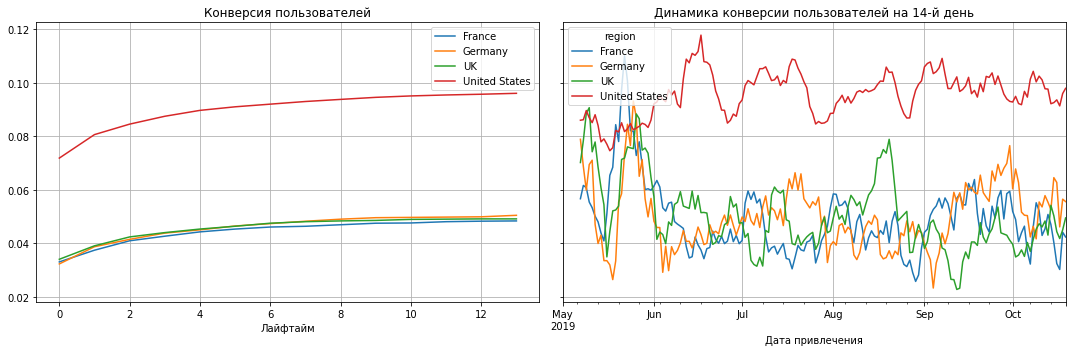

In [35]:
conversion_raw, conversion_grouped, conversion_history = get_conversion (profiles, orders, observation_date, horizon_days, dimensions=['region'], ignore_horizon=False)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США стабильно выше конверсии пользователей из других стран.

### Окупаемость рекламы в разрезе каналов привлечения

Далее, оценим окупаемость рекламы с разбивкой по рекламным каналам:

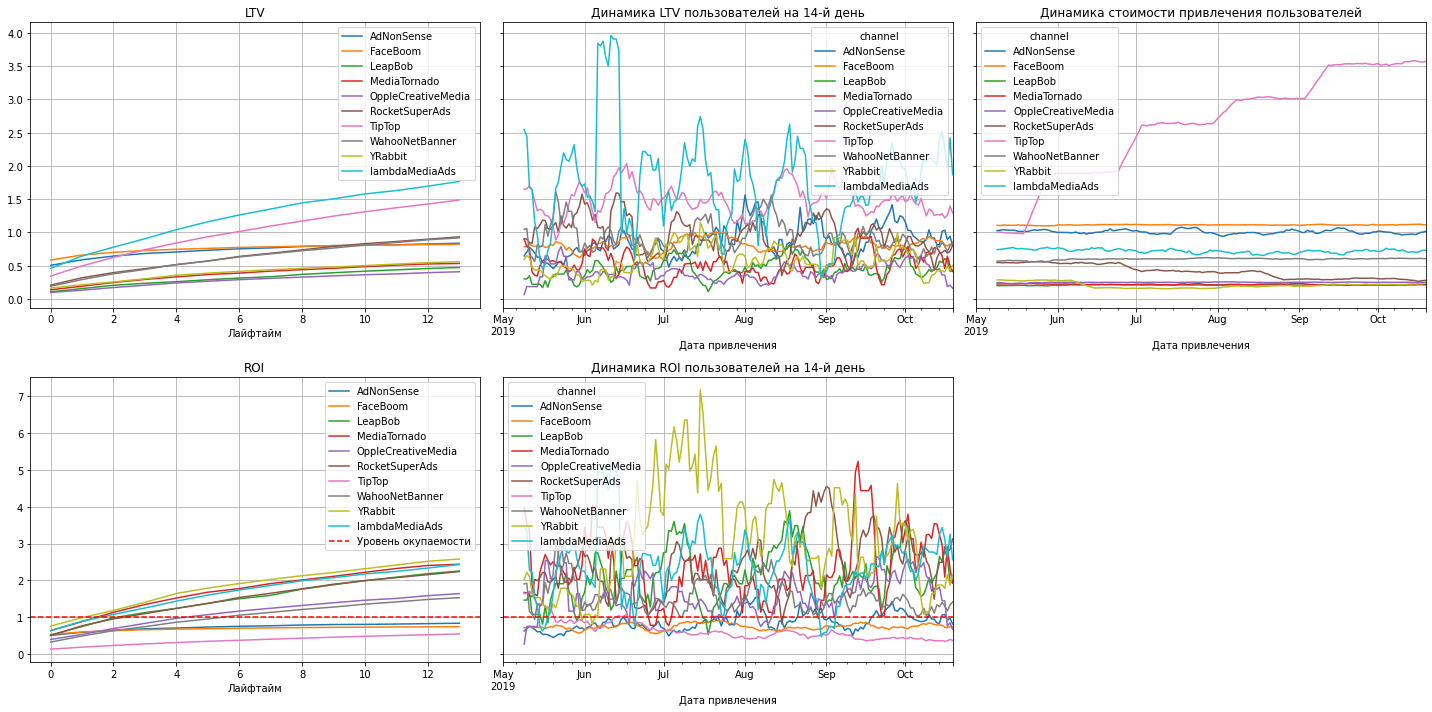

In [36]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, 
                                                      horizon_days, dimensions=['channel'], ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=9)


Проанализируем каждый график более детально:

**LTV** - на 14 день жизни выручка с одного пользователя уже варьируется очень сильно, в зависимости от канала привлечения.

**Динамика LTV пользователей на 14-й день** - динамика сильно различается в зависимости от рекламного канала.

**Динамика стоимости привлечения пользователей** - здесь можно явно выделить канал TipTop у которого стоимость привлечения выросла почти в 4 раза.

**ROI** - не окупаются каналы привлечения: AdNonSense, FaceBoom и TipTop

**Динамика ROI пользователей на 14-й день** - все каналы привлечения, кроме AdNonSense, FaceBoom и TipTop стабильно окупаются в течение всего времени наблюдения.

Дополнительно оценим удержание пользователей и конверсию:

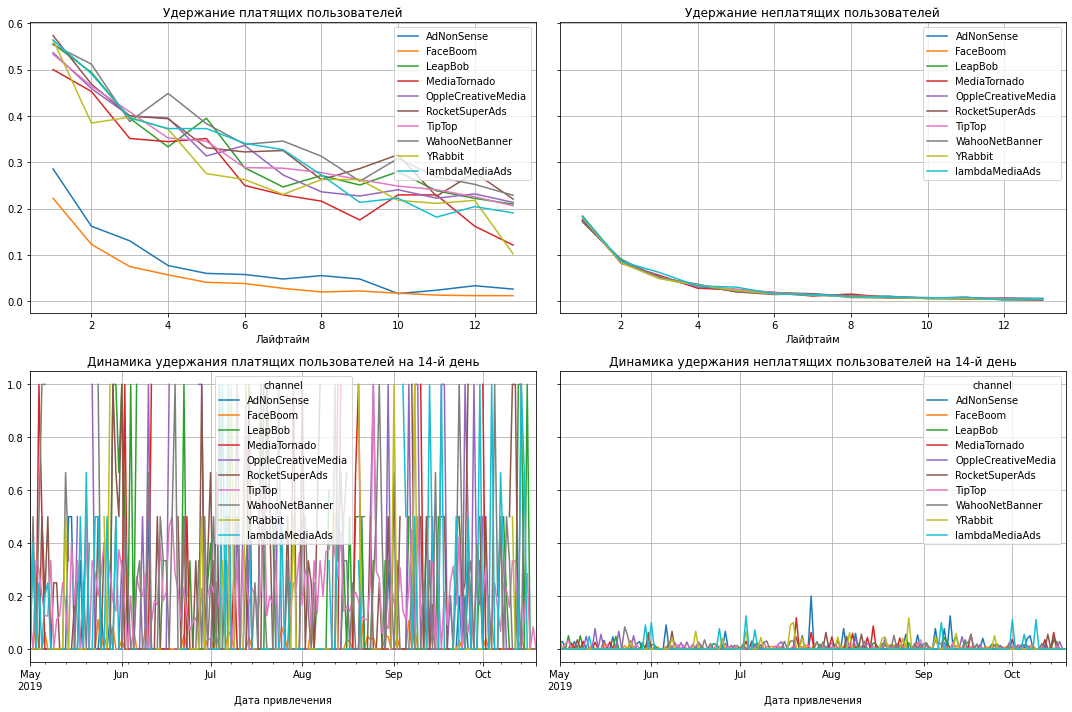

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['channel'], ignore_horizon = False)
plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи, пришедшие из каналов AdNonSense и FaceBoom реже всего повторно заходят в приложение.

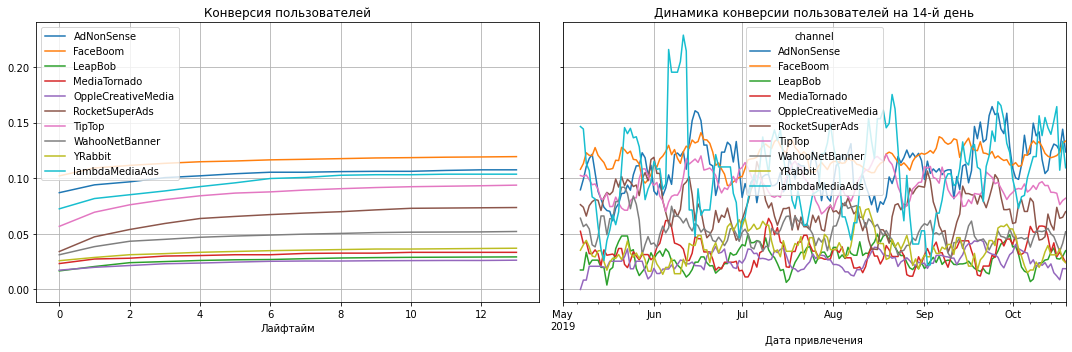

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion (profiles, orders, observation_date, horizon_days, dimensions=['channel'], ignore_horizon=False)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей сильно зависит от канала привлечения. Больше всего целевых действий совершают пользователи FaceBoom, Organic, lambdaMediaAds, TipTop.

## Выводы

#### Причины неэффективности привлечения пользователей:
* Стоимость привлечения пользователей iPhone и Mac стабильно дорожает, при этом выручка с них не успевает покрывать удорожание привлечения.
* Стоимость привлечения пользователей из США очень сильно дорожает, при этом пользователей из США большинство. Выручка также не успевает перекрыть подорожание привлечения.
* Каналы AdNonSense, FaceBoom и TipTop являются неэффективными, хотя и обладают высокой конверсией. Отдельного внимания заслуживает канал TipTop, стоимость привлечения в котором стабильно растёт, причем стоимость привлечения в данном канале в конце наблюдаемого периода почти в 4 раза выше, чем в начале периода

#### Рекомендации для отдела маркетинга

1. Если есть возможность уменьшить стоимость привлечения пользователей в неэффективных каналах, это необходимо сделать (например, изменить метод оплаты рекламы). В случае, если это сделать невозможно, потенциально лучше полностью отказаться от таких каналов. Либо необходимо переводить пользователей из убыточных каналов в органический (например, за счёт развития уровня контента, а не постоянного увеличения рекламного бюджета).
2. Необходимо расширять географию пользователей, а так же делать упор на высокоэффективные страны с небольшим числом пользователей (например, Великобритания)
3. Пользователи Mac и iPhone являются очень дорогими с точки зрения привлечения. Стоит сделать дополнительный акцент на пользователях других устройств.
4. Самым простым способом является отказ от убыточных источников, девайсов и стран, однако такой отказ может негативно повлиять на популярность приложения в целом и иметь негативные последствия на долгом сроке, поэтому такое решение требует крайне обдуманного и взвешенного подхода.

Первостепенной рекомендацией выступает детальное изучение канала TipTop на предмет удешевления стоимости привлечения пользователей, так как данный канал привлекает большое количество пользователей с хорошими показателями. 
В целом, если уменьшить стоимость привлечения из неэффективных каналов, то данные каналы будут приносить очень высокую прибыль.
